In [6]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levene
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pylab 
import scipy.stats as stats
from bioinfokit.analys import stat

def split(df, col):
    return [
        df[df["handedness"] == "left"][df["sex"] == "female"][col],
        df[df["handedness"] == "left"][df["sex"] == "male"][col],
        df[df["handedness"] == "right"][df["sex"] == "female"][col],
        df[df["handedness"] == "right"][df["sex"] == "male"][col]
    ]

def vartest(df,col):
    s = split(df,col)
    stat, p = levene(s[0],s[1],s[2],s[3])
    print("F value:", round(stat,4), "Pr(>F)", round(p,4))

def anova(df, col):
    model = ols(col + ' ~ sex * handedness', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=3)
    return anova_table


In [7]:
data = pd.read_csv("data.csv")
data = data.sort_values(["sex", "handedness"])
mypal = {sex: '#f9665e' if sex == "female" else '#799fcb' for sex in data["sex"].unique()}

In [8]:
ft = data
ft["group"] = ft["handedness"] + ft["sex"]

### Tiriamieji grafikai

<AxesSubplot:xlabel='handedness', ylabel='t4'>

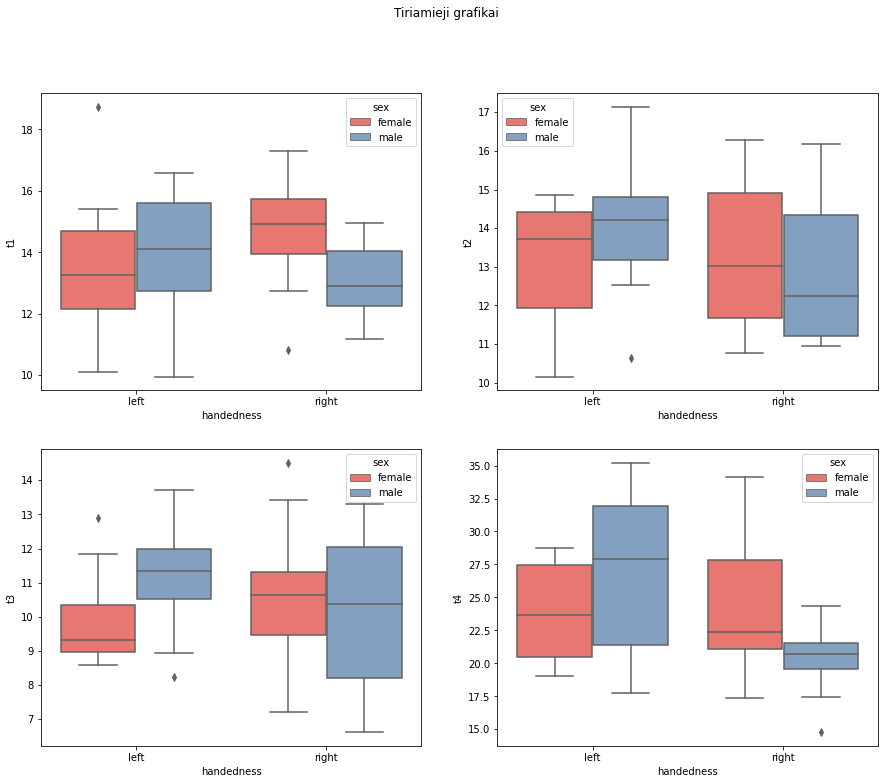

In [9]:
fig, axes = plt.subplots(2, 2,figsize=(15,12))
fig.suptitle("Tiriamieji grafikai")
sns.boxplot(ax = axes[0,0],x="handedness", y="t1", hue="sex", data=data, palette=mypal)
sns.boxplot(ax = axes[0,1],x="handedness", y="t2", hue="sex", data=data, palette=mypal)
sns.boxplot(ax = axes[1,0],x="handedness", y="t3", hue="sex", data=data, palette=mypal)
sns.boxplot(ax = axes[1,1],x="handedness", y="t4", hue="sex", data=data, palette=mypal)

### Vidurkių grafikas

In [10]:
means = data.groupby(['sex','handedness']).mean()

<AxesSubplot:xlabel='handedness', ylabel='t4'>

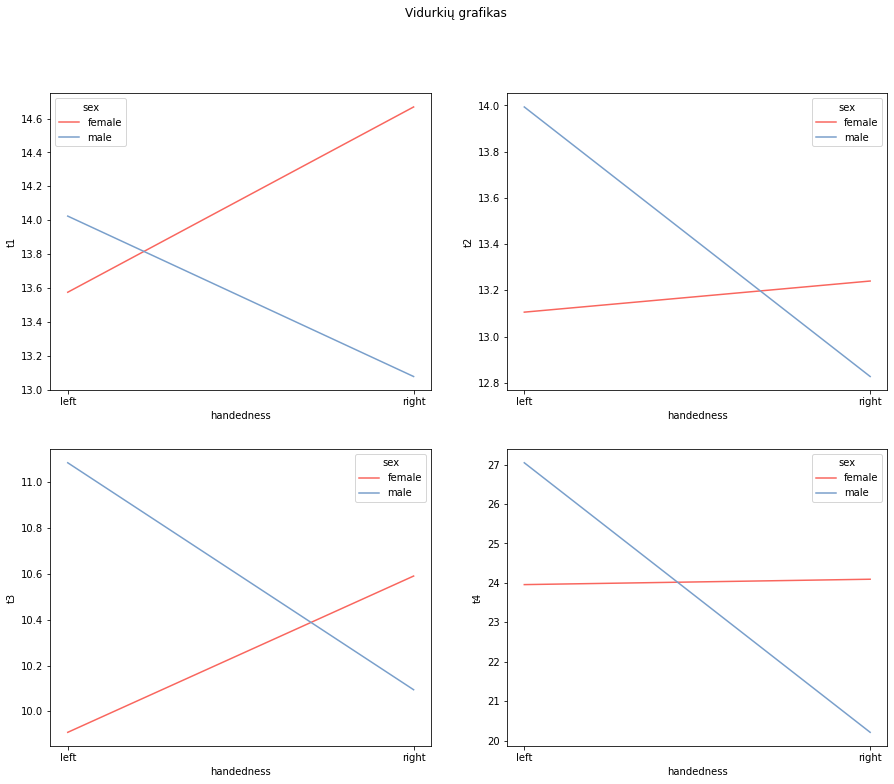

In [11]:
fig, axes = plt.subplots(2, 2,figsize=(15,12))
fig.suptitle("Vidurkių grafikas")
sns.lineplot(ax = axes[0,0],x="handedness", y="t1", hue="sex", data=means, palette=mypal)
sns.lineplot(ax = axes[0,1],x="handedness", y="t2", hue="sex", data=means, palette=mypal)
sns.lineplot(ax = axes[1,0],x="handedness", y="t3", hue="sex", data=means, palette=mypal)
sns.lineplot(ax = axes[1,1],x="handedness", y="t4", hue="sex", data=means, palette=mypal)

### Dispersijų lygybės testas 

In [12]:
vartest(data,"t1")

F value: 0.8848 Pr(>F) 0.4572


In [13]:
vartest(data,"t2")

F value: 0.4793 Pr(>F) 0.6985


In [14]:
vartest(data,"t3")

F value: 1.7389 Pr(>F) 0.1745


In [15]:
vartest(data,"t4")

F value: 1.8124 Pr(>F) 0.1604


### Anova

In [16]:
anova(data, "t1")

,sum_sq,df,F,PR(>F)
Intercept,1842.757078,1.0,507.629040,2.428428e-24
sex,1.102086,1.0,0.303594,5.847024e-01
handedness,6.979565,1.0,1.922679,1.732417e-01
sex:handedness,10.967304,1.0,3.021191,8.987678e-02
Residual,145.205016,40.0,NaN,NaN


In [17]:
anova(data, "t2")

,sum_sq,df,F,PR(>F)
Intercept,1717.564555,1.0,538.700233,8.037321e-25
sex,4.301995,1.0,1.349286,2.522877e-01
handedness,0.105805,1.0,0.033185,8.563713e-01
sex:handedness,4.459198,1.0,1.398591,2.439417e-01
Residual,127.533975,40.0,NaN,NaN


In [18]:
anova(data, "t3")

,sum_sq,df,F,PR(>F)
Intercept,981.812039,1.0,276.846236,1.413343e-19
sex,7.541214,1.0,2.126432,1.525851e-01
handedness,2.710706,1.0,0.764351,3.871895e-01
sex:handedness,7.358940,1.0,2.075035,1.575086e-01
Residual,141.856657,40.0,NaN,NaN


In [19]:
anova(data, "t4")

,sum_sq,df,F,PR(>F)
Intercept,5738.425909,1.0,261.107038,3.929689e-19
sex,52.051729,1.0,2.368432,1.316855e-01
handedness,0.108554,1.0,0.004939,9.443204e-01
sex:handedness,127.945606,1.0,5.821718,2.050468e-02
Residual,879.091725,40.0,NaN,NaN


### HSD

In [20]:
res = stat()
res.tukey_hsd(df=ft, res_var='t4', xfac_var='group', anova_model='t4 ~ group')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,leftfemale,rightfemale,0.136416,-5.066654,5.339486,0.099392,0.900000
1,leftfemale,leftmale,3.089145,-2.291556,8.469846,2.176434,0.425942
2,leftfemale,rightmale,3.745010,-2.215856,9.705877,2.381714,0.345613
3,rightfemale,leftmale,2.952729,-1.990949,7.896407,2.264224,0.390736
4,rightfemale,rightmale,3.881426,-1.688128,9.450981,2.641903,0.257923
5,leftmale,rightmale,6.834156,1.098309,12.570002,4.516826,0.013984
